In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

# Resampling Within Subjects Design
Each row represents one *subject*, before and after a treatment

In [2]:
df = np.array([[24, 27], [79, 80], [17,18], [50, 50], [98, 99], [45,47], [97, 97], [67,70], [76, 79], [85, 87], [76, 78]])
print(df)


[[24 27]
 [79 80]
 [17 18]
 [50 50]
 [98 99]
 [45 47]
 [97 97]
 [67 70]
 [76 79]
 [85 87]
 [76 78]]


## The Wrong Way

Let's compare means of the before and after the treatment column

In [ ]:
mean_before_after = np.mean(df, axis=0)

mean_before_after

In [ ]:
difference_in_means = mean_before_after[1] - mean_before_after[0]

difference_in_means

Now, lets draw resamples to see whether the observed differnece in means is really significant.

In [ ]:
resamples = np.random.choice(df.flat, (1000, 11, 2))
resamples_mean = np.mean(resamples, axis=1)
diff_res_means = resamples_mean[:, 1] - resamples_mean[:, 0]

In [ ]:
sns.distplot(diff_res_means)
plt.title("Randomly shuffled over all axes - within and between groups")
plt.xlabel("Difference in means before and after treatment")


$\Rightarrow$ The observed difference in means of $1.64$ is **nowhere near significant**. But for each participants, the threatment ***improved*** or at least did not change the value.  
This is because the difference within subjects (from before treatment to after treatment) is super small compared to the difference between individuals.


## The Correct Way
Shuffle the data within subject (so, for each sample). This preserves the within subject and between subject variance. 

In [ ]:
np.apply_along_axis(np.random.shuffle, axis=1, arr=df)

In [ ]:
df

In [ ]:
within_means = np.zeros((1000, 2))
for i in range(1000):
    np.apply_along_axis(np.random.shuffle, axis=1, arr=df)
    within_means[i] = np.mean(df, axis=0)

In [ ]:
diff_within_means = within_means[:, 1] - within_means[:, 0]
sns.distplot(diff_within_means)
plt.title("Shuffled only within a sample - swapping columns")
plt.xlabel("Difference in means before and after treatment")

$\Rightarrow$ The observed difference im means is significant if we only look at the within-group difference.

$\Rightarrow$ The observed difference im means is significant if we only look at the within-group difference.

Let's compare means of the before and after the treatment column

In [3]:
mean_before_after = np.mean(df, axis=0)

mean_before_after

array([64.90909091, 66.54545455])

In [4]:
difference_in_means = mean_before_after[1] - mean_before_after[0]

difference_in_means

1.6363636363636402

Now, lets draw resamples to see whether the observed differnece in means is really significant.

In [5]:
resamples = np.random.choice(df.flat, (1000, 11, 2))
resamples_mean = np.mean(resamples, axis=1)
diff_res_means = resamples_mean[:, 1] - resamples_mean[:, 0]

Text(0.5, 0, 'Difference in means before and after treatment')

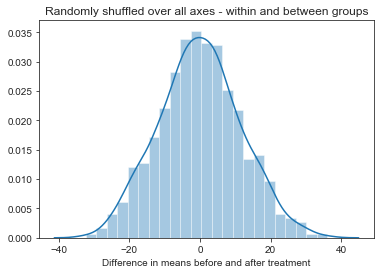

In [6]:
sns.distplot(diff_res_means)
plt.title("Randomly shuffled over all axes - within and between groups")
plt.xlabel("Difference in means before and after treatment")


$\Rightarrow$ The observed difference in means of $1.64$ is **nowhere near significant**. But for each participants, the threatment ***improved*** or at least did not change the value.  
This is because the difference within subjects (from before treatment to after treatment) is super small compared to the difference between individuals.


## The Correct Way
Shuffle the data within subject (so, for each sample). This preserves the within subject and between subject variance. 

In [7]:
np.apply_along_axis(np.random.shuffle, axis=1, arr=df)

array([None, None, None, None, None, None, None, None, None, None, None],
      dtype=object)

In [8]:
df

array([[27, 24],
       [79, 80],
       [17, 18],
       [50, 50],
       [99, 98],
       [47, 45],
       [97, 97],
       [70, 67],
       [76, 79],
       [85, 87],
       [76, 78]])

In [9]:
within_means = np.zeros((1000, 2))
for i in range(1000):
    np.apply_along_axis(np.random.shuffle, axis=1, arr=df)
    within_means[i] = np.mean(df, axis=0)

Text(0.5, 0, 'Difference in means before and after treatment')

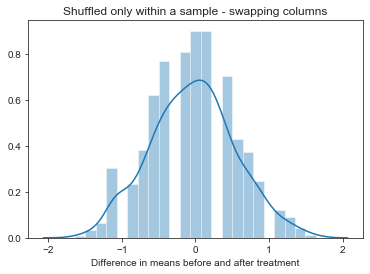

In [10]:
diff_within_means = within_means[:, 1] - within_means[:, 0]
sns.distplot(diff_within_means)
plt.title("Shuffled only within a sample - swapping columns")
plt.xlabel("Difference in means before and after treatment")

$\Rightarrow$ The observed difference im means is significant if we only look at the within-group difference.